# Multi-Class Image Classification Practice w/ Intel Images Dataset from Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, losses, optimizers, callbacks

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [14]:
X_train[0].shape

(28, 28)

In [15]:
labels = list(np.unique(y_train))
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [16]:
split_value = int(0.8 * len(X_train))

X_train_split = X_train[:split_value]
y_train_split = y_train[:split_value]

X_val_split = X_train[split_value:]
y_val_split = y_train[split_value:]

In [17]:
len(X_train_split), len(y_train_split), len(X_val_split), len(y_val_split)

(48000, 48000, 12000, 12000)

In [18]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

In [20]:
X_train_split / 255.0
X_val_split / 255.0

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
X_train_split.shape
X_val_split.shape

(12000, 28, 28)

In [31]:
dense = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, 'relu'),
    layers.Dropout(0.5),
    layers.Dense(64, 'relu'),
    layers.Dropout(0.3),
    layers.Dense(32, 'relu'),
    layers.Dense(len(labels), 'softmax')
], name='dense')

dense.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

dense.fit(X_train_split, y_train_split, epochs=20, 
          validation_data=(X_val_split, y_val_split))

Epoch 1/20
1500/1500 [==============================] - 11s 6ms/step - loss: 3.3895 - accuracy: 0.2807 - val_loss: 1.4969 - val_accuracy: 0.4389
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.6999 - accuracy: 0.3648 - val_loss: 1.2661 - val_accuracy: 0.5190
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 1.5299 - accuracy: 0.4280 - val_loss: 1.0830 - val_accuracy: 0.6263
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3583 - accuracy: 0.4999 - val_loss: 0.8757 - val_accuracy: 0.7630
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1854 - accuracy: 0.5704 - val_loss: 0.6680 - val_accuracy: 0.8334
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 1.0107 - accuracy: 0.6322 - val_loss: 0.5258 - val_accuracy: 0.8829
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8835 - accuracy: 0.7002 - val_loss: 0.4543 - val_accura

In [32]:
y_pred = dense.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
y_pred.shape

(10000, 10)

In [35]:
test_loss, test_acc = dense.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.9012
Test accuracy: 0.901199996471405


Let's do one more architecture to blow our attempt out of the water using the LeNet architecture...

In [43]:
# Try with LeNet architecture (trained on grayscale images)
def build_lenet(input_shape=(28, 28, 1), num_classes=10):
    # Define the model
    model = tf.keras.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

lenet = build_lenet()

history = lenet.fit(X_train_split, y_train_split, epochs=20, 
          validation_data=(X_val_split, y_val_split))

Epoch 1/20
1500/1500 [==============================] - 43s 28ms/step - loss: 0.5688 - accuracy: 0.9014 - val_loss: 0.1206 - val_accuracy: 0.9639
Epoch 2/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1075 - accuracy: 0.9674 - val_loss: 0.0897 - val_accuracy: 0.9731
Epoch 3/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0780 - accuracy: 0.9769 - val_loss: 0.0727 - val_accuracy: 0.9791
Epoch 4/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0979 - val_accuracy: 0.9722
Epoch 5/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.0691 - val_accuracy: 0.9807
Epoch 6/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0569 - val_accuracy: 0.9840
Epoch 7/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0842 -

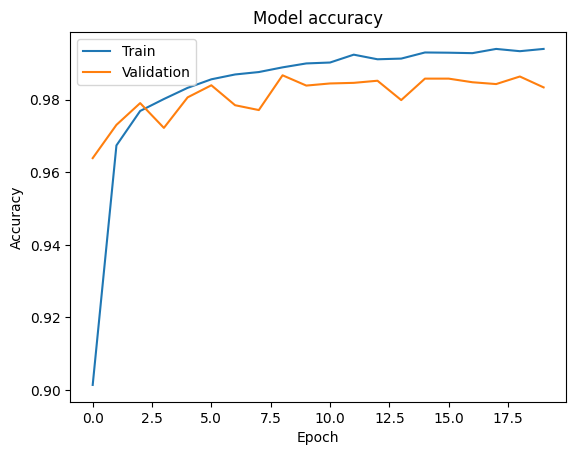

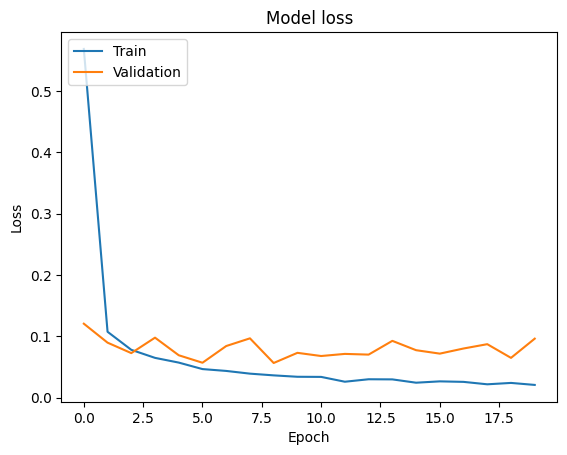

In [44]:
# Plot loss and accuracy
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

In [45]:
lenet_preds = lenet.predict(X_test)

test_loss, test_acc = lenet.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0755 - accuracy: 0.9840
Test accuracy: 0.984000027179718


Substantially better. However, it looks to be overfitting on both the train and val data a little bit, especially toward the end of the training cycle... Adding a few callbacks could easily address this (e.g. early stopping, learning rate scheduler, and reduce LR on plateau), but we won't worry about them here because **98.5% accuracy** is already pretty good.

## [ **Thank you** ]